In [1]:
import os
import urllib
import re
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import torch
import torchcde
import h5py

In [5]:
targetdir = '/work/hmzhao/KMT_data/'

In [2]:
def download(targetdir, eventid):
    # https://kmtnet.kasi.re.kr/ulens/event/2019/data/KB190304/pysis/pysis.tar.gz
    file_name = 'http://kmtnet.kasi.re.kr/~ulens/event/2019/data/KB19'+str(eventid)+'/pysis/pysis.tar.gz'
    os.system("mkdir " + targetdir + 'KMT-2019-BLG-' + str(eventid))
    os.system("wget -qO "+ targetdir + "temp.tar.gz " + file_name)
    os.system("tar -xzf " + targetdir + "temp.tar.gz -C "+ targetdir + 'KMT-2019-BLG-' + str(eventid))
    os.system("rm -f " + targetdir + "temp.tar.gz")
    print('KMT-2019-BLG-' + str(eventid) + " has completed")
    return 0

def grab_param(url):
    # 打开传入的网址
    resp = urllib.request.urlopen(url)
    # 读取网页源码内容
    data = resp.read().decode('utf-8')
    labels = ["t_0","[t_E]*[t_eff]*",r"u_0","Ibase"]
    values = []
    for label in labels:
        pattern = r"<td width=130>"+label+"</td>.*</tr>"
        te_str = re.findall(pattern, data)[0]
        match_te = re.findall(r"<td>[\.\d]*</td>",te_str)
        match_te_f = re.split(r"[<>]",match_te[0])[2]
        values.append(float(match_te_f))
    return values

In [6]:
eventid_list = [
    # Planet/Binary
    '0328', '0570', '1196', '1860', '1914', 
    # Binary/Plan
    '0002', '0104', '0143', '0149', '0182',
    '0308', '0681', '0724', '1187', '1713',
    '2270', '2485', '3199', 
    # Binary
    '0021', '0200', '0209', '0236', '0270',
    '0325', '0335', '0342', '0343', '0386',
    '0412', '0535', '0561', '0609', '0649',
    '0651', '0787', '0819', '0967', '1182',
    '1195', '1281', '1291', '1334', '1363',
    '1524', '1576', '1679', '1686', '1689',
    '1700', '1722', '1850', '1984', '2063',
    '2142', '2279', '2286', '2298', '2309',
    '2324', '2496', '2596', '2599', '2655',
    '2667', '2769', '2840', '2842', '2888',
    ]
print(len(eventid_list))

68


In [8]:
params = np.zeros((len(eventid_list), 4))
for i, eventid in tqdm(enumerate(eventid_list)):
    download(targetdir=targetdir, eventid=eventid)
    event_url = 'http://kmtnet.kasi.re.kr/~ulens/event/2019/view.php?event=KMT-2019-BLG-' + eventid
    params[i] = grab_param(event_url)

0it [00:00, ?it/s]

mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0328’: File exists


KMT-2019-BLG-0328 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0570’: File exists


KMT-2019-BLG-0570 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1196’: File exists


KMT-2019-BLG-1196 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1860’: File exists


KMT-2019-BLG-1860 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1914’: File exists


KMT-2019-BLG-1914 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0002’: File exists


KMT-2019-BLG-0002 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0104’: File exists


KMT-2019-BLG-0104 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0143’: File exists


KMT-2019-BLG-0143 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0149’: File exists


KMT-2019-BLG-0149 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0182’: File exists


KMT-2019-BLG-0182 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0308’: File exists


KMT-2019-BLG-0308 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0681’: File exists


KMT-2019-BLG-0681 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0724’: File exists


KMT-2019-BLG-0724 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1187’: File exists


KMT-2019-BLG-1187 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1713’: File exists


KMT-2019-BLG-1713 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2270’: File exists


KMT-2019-BLG-2270 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2485’: File exists


KMT-2019-BLG-2485 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-3199’: File exists


KMT-2019-BLG-3199 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0021’: File exists


KMT-2019-BLG-0021 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0200’: File exists


KMT-2019-BLG-0200 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0209’: File exists


KMT-2019-BLG-0209 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0236’: File exists


KMT-2019-BLG-0236 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0270’: File exists


KMT-2019-BLG-0270 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0325’: File exists


KMT-2019-BLG-0325 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0335’: File exists


KMT-2019-BLG-0335 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0342’: File exists


KMT-2019-BLG-0342 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0343’: File exists


KMT-2019-BLG-0343 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0386’: File exists


KMT-2019-BLG-0386 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0412’: File exists


KMT-2019-BLG-0412 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0535’: File exists


KMT-2019-BLG-0535 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0561’: File exists


KMT-2019-BLG-0561 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0609’: File exists


KMT-2019-BLG-0609 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0649’: File exists


KMT-2019-BLG-0649 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0651’: File exists


KMT-2019-BLG-0651 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0787’: File exists


KMT-2019-BLG-0787 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0819’: File exists


KMT-2019-BLG-0819 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-0967’: File exists


KMT-2019-BLG-0967 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1182’: File exists


KMT-2019-BLG-1182 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1195’: File exists


KMT-2019-BLG-1195 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1281’: File exists


KMT-2019-BLG-1281 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1291’: File exists


KMT-2019-BLG-1291 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1334’: File exists


KMT-2019-BLG-1334 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1363’: File exists


KMT-2019-BLG-1363 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1524’: File exists


KMT-2019-BLG-1524 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1576’: File exists


KMT-2019-BLG-1576 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1679’: File exists


KMT-2019-BLG-1679 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1686’: File exists


KMT-2019-BLG-1686 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1689’: File exists


KMT-2019-BLG-1689 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1700’: File exists


KMT-2019-BLG-1700 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1722’: File exists


KMT-2019-BLG-1722 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1850’: File exists


KMT-2019-BLG-1850 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-1984’: File exists


KMT-2019-BLG-1984 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2063’: File exists


KMT-2019-BLG-2063 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2142’: File exists


KMT-2019-BLG-2142 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2279’: File exists


KMT-2019-BLG-2279 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2286’: File exists


KMT-2019-BLG-2286 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2298’: File exists


KMT-2019-BLG-2298 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2309’: File exists


KMT-2019-BLG-2309 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2324’: File exists


KMT-2019-BLG-2324 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2496’: File exists


KMT-2019-BLG-2496 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2596’: File exists


KMT-2019-BLG-2596 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2599’: File exists


KMT-2019-BLG-2599 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2655’: File exists


KMT-2019-BLG-2655 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2667’: File exists


KMT-2019-BLG-2667 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2769’: File exists


KMT-2019-BLG-2769 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2840’: File exists


KMT-2019-BLG-2840 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2842’: File exists


KMT-2019-BLG-2842 has completed


mkdir: cannot create directory ‘/work/hmzhao/KMT_data/KMT-2019-BLG-2888’: File exists


KMT-2019-BLG-2888 has completed


  0%|          | 0/68 [00:00<?, ?it/s]

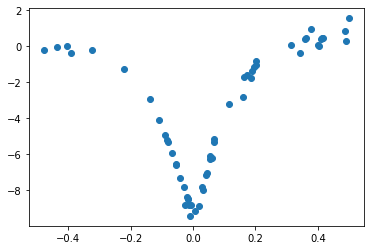

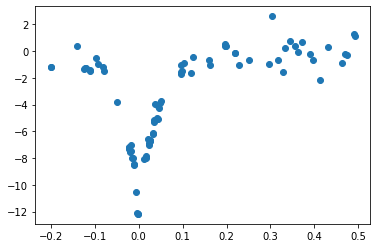

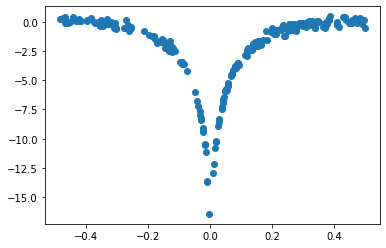

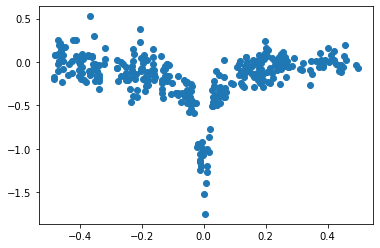

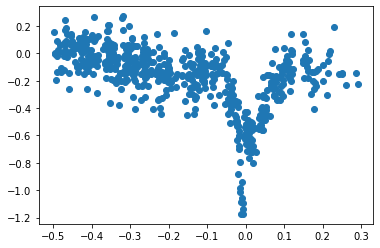

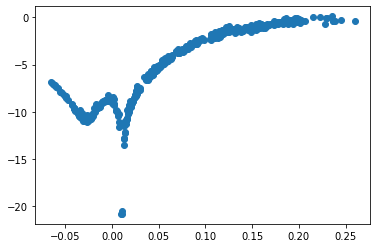

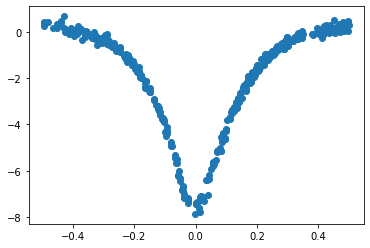

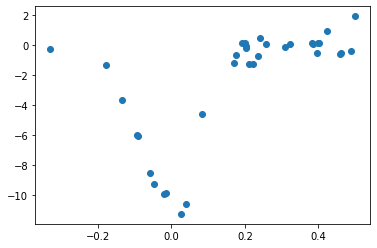

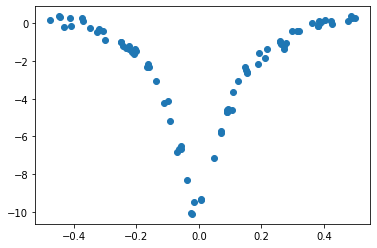

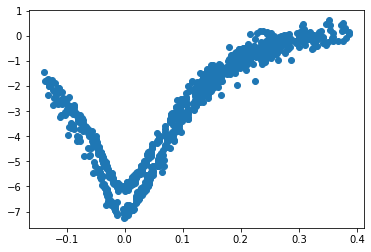

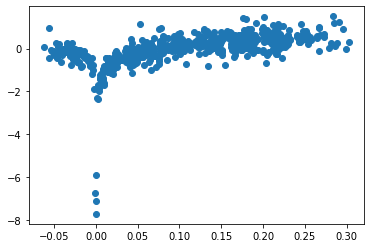

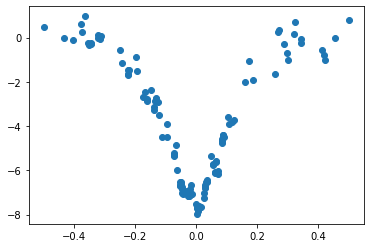

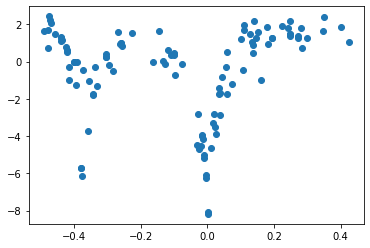

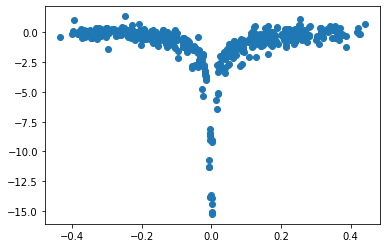

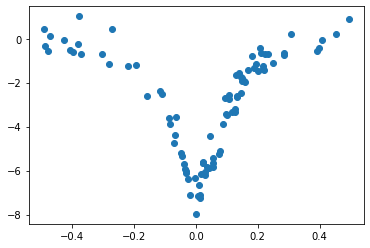

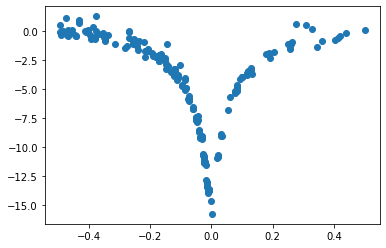

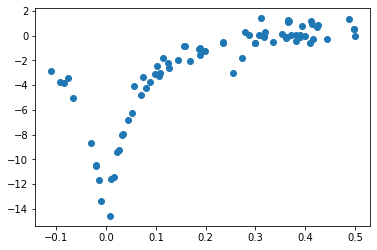

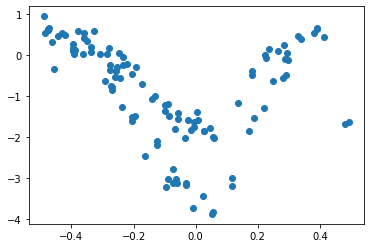

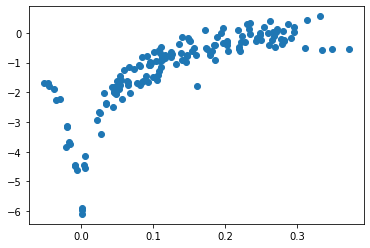

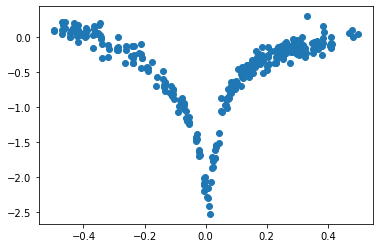

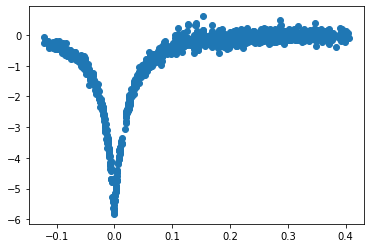

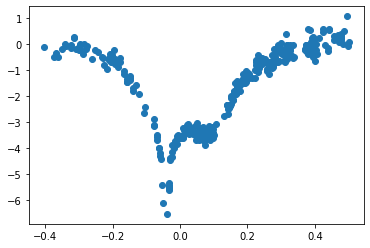

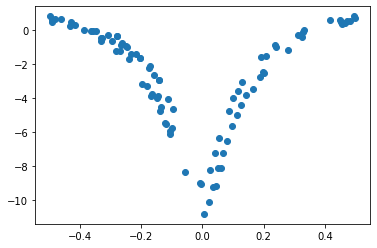

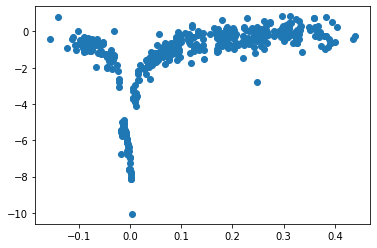

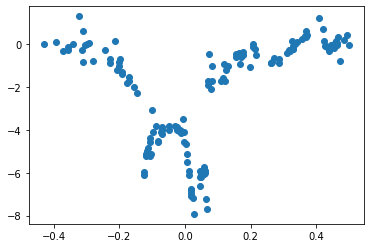

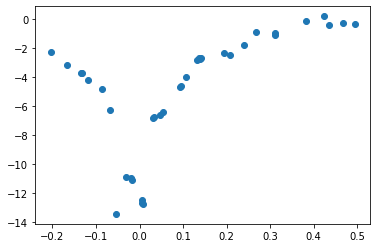

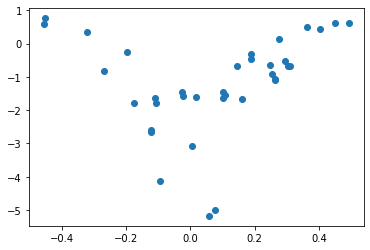

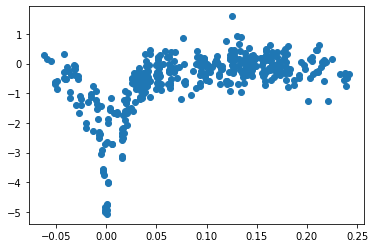

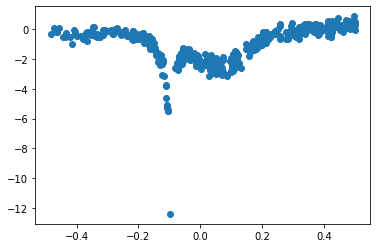

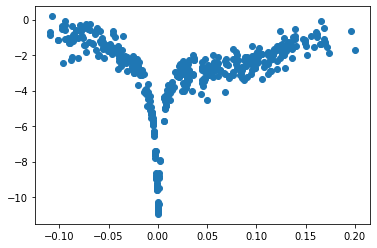

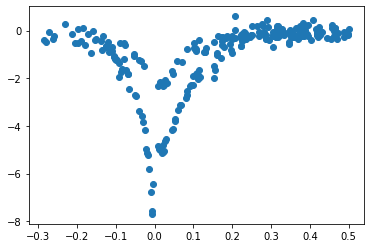

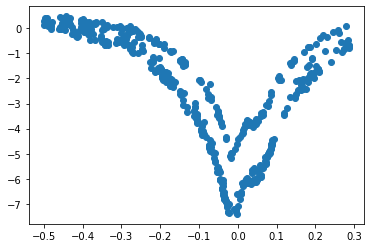

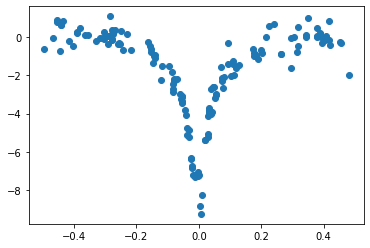

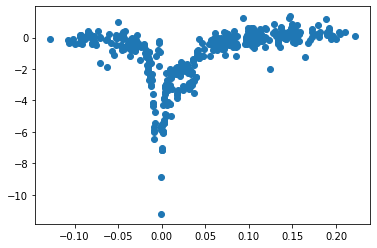

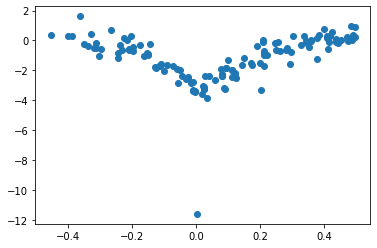

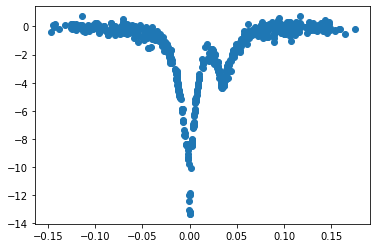

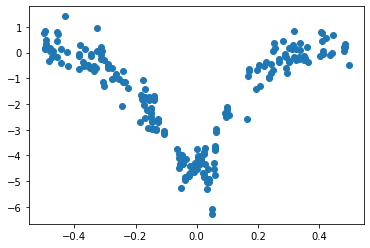

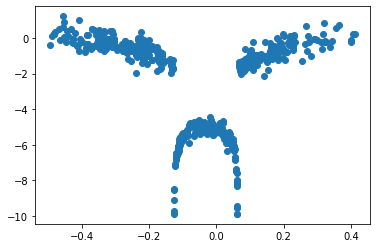

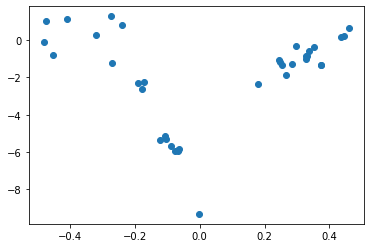

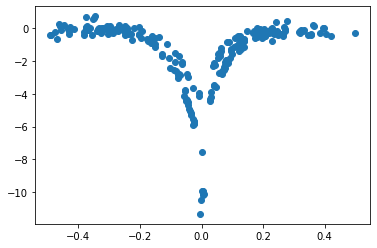

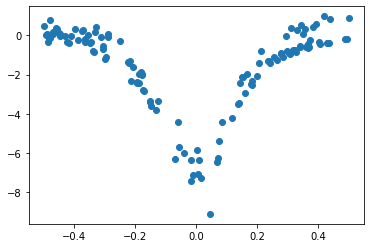

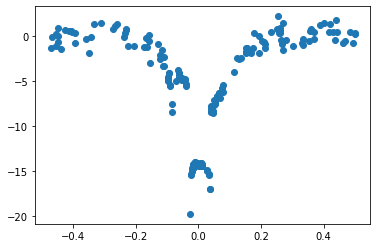

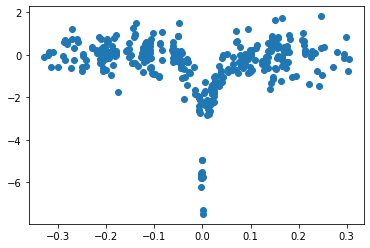

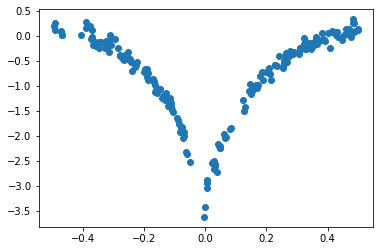

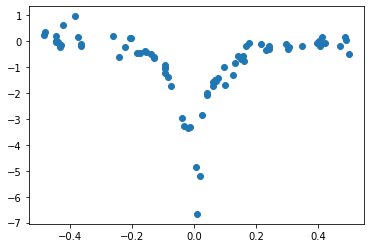

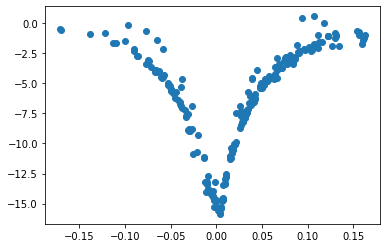

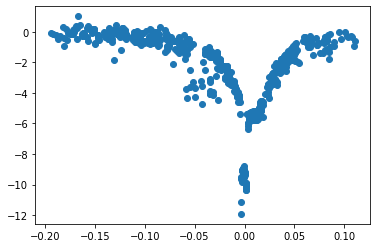

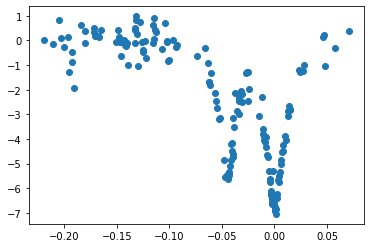

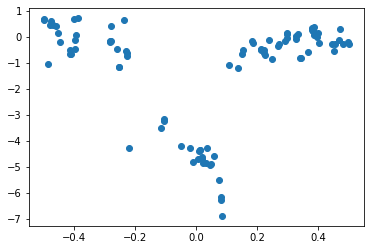

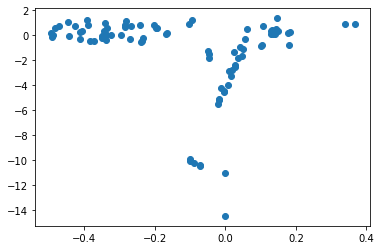

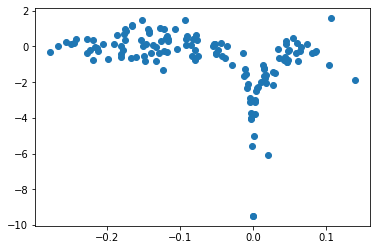

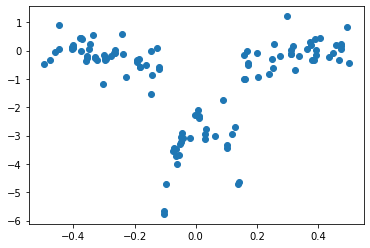

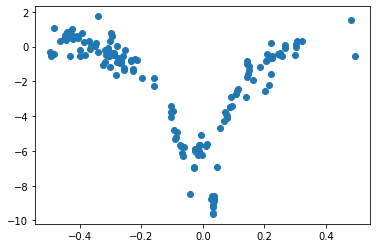

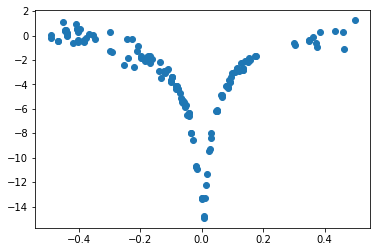

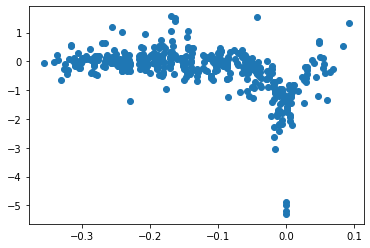

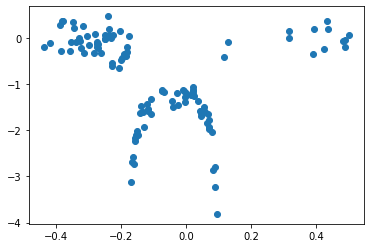

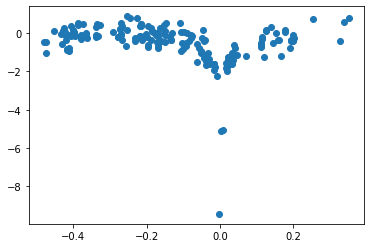

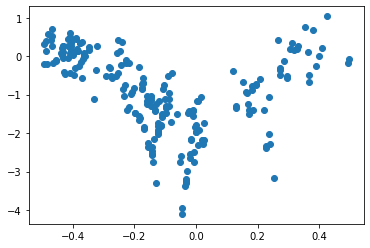

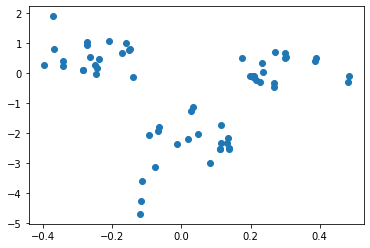

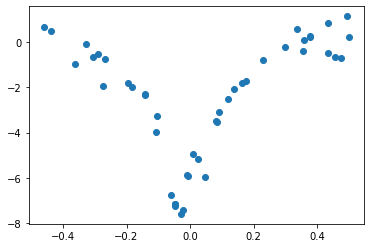

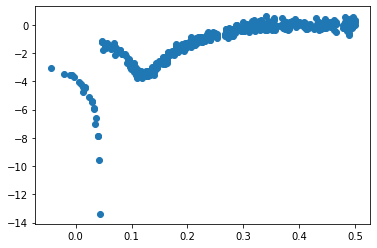

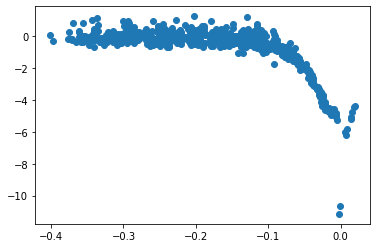

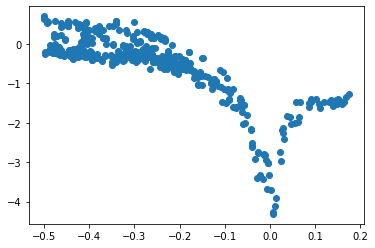

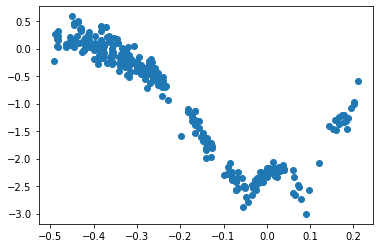

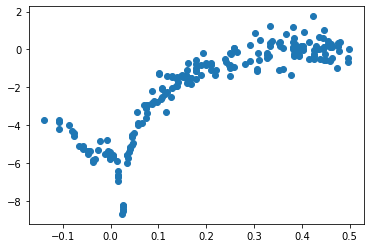

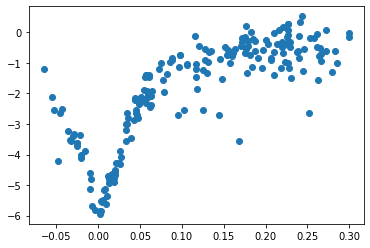

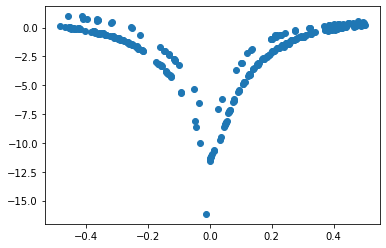

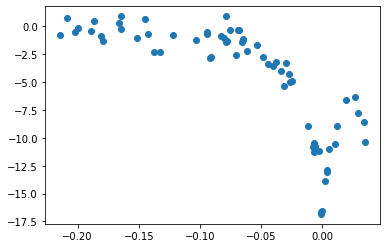

  0%|          | 0/68 [00:00<?, ?it/s]

In [11]:
max_len = 0
lc = []
for i in tqdm(range(len(eventid_list))):
    data = []
    for root, dirs, files in os.walk(targetdir + 'KMT-2019-BLG-' + eventid_list[i]):
        for f in files:
            if 'V' not in f:
                p = re.compile('___')
                file = open(f'{targetdir}KMT-2019-BLG-{eventid_list[i]}/{f}', 'r+')
                lines = [line for line in file.readlines() if p.search(line) is None]
                file.seek(0)
                file.truncate(0)
                file.writelines(lines)
                file.close()

                data.append(np.loadtxt(f'{targetdir}KMT-2019-BLG-{eventid_list[i]}/{f}'))
    data = np.vstack(data)
    data = data[np.argsort(data[:, 0])]
    t0 = params[i, 0]; te = params[i, 1]; Ibase = params[i, -1]
    # print(t0, te, Ibase)
    data = data[(data[:, 0] > t0 - 2 * te) * (data[:, 0] < t0 + 2 * te)]
    data[:, 0] = (data[:, 0] - t0) / (4 * te)
    data = np.delete(data, np.where(data[:, 5] > 7), axis=0)
    data = np.delete(data, np.where(data[:, 5] < 0), axis=0)
    data = np.delete(data, np.where(data[:, 4] > data[:, 3] / 100), axis=0)
    if len(data[np.abs(data[:, 0]) > 0.3][:, 3]) == 0:
        m0 = Ibase
    else:
        m0 = data[np.abs(data[:, 0]) > 0.3][:, 3].mean()
    flux = 10. ** ((m0 - data[:, 3]) / 2.5)
    data[:, 3] = 22 - 2.5 * np.log10(1000 * flux)
    data[:, 3] = (data[:, 3] - 14.5) / 0.2
    data = np.delete(data, np.where(np.abs(np.diff(data[:, 3])) > 0.2), axis=0)
    plt.scatter(data[:, 0], data[:, 3])
    plt.show()
    data = torch.tensor(data[:, [0, 3]]).unsqueeze(0)
    depth = 3; window_length = max(data.shape[-2]//100, 1)
    data = torchcde.logsig_windows(data, depth, window_length=window_length).squeeze(0)
    max_len = max(max_len, data.shape[-2])
    lc.append(data)

data = torch.zeros(len(eventid_list), max_len, data.shape[-1])
for i in tqdm(range(len(eventid_list))):
    data[i] = torch.cat([lc[i], lc[i][-1].expand(max_len - len(lc[i]), lc[i].shape[-1])])

with h5py.File(targetdir + 'processed_data.h5', mode='w') as dataset_file:
    dataset_file['X'] = data